In [1]:
%load_ext autoreload

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [3]:
from lsst.sims.catalogs.measures.instance import InstanceCatalog

/usr/local/manual/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
from lsst.sims.catUtils.mixins import CosmologyMixin
from lsst.sims.utils import ObservationMetaData
from lsst.sims.catUtils.utils import ObservationMetaDataGenerator

Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values


In [5]:

from lsst.sims.photUtils import BandpassDict

In [6]:
lsst_bp = BandpassDict.loadTotalBandpassesFromFiles()

In [7]:
import seaborn as sns
sns.set()

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.


In [8]:
import pandas as pd

In [9]:
degConv = np.array([1., 1./60., 1./3600.])
raConv = degConv / 24.0 * 360.
centralRA = np.dot(np.array([3., 32., 30]), raConv) #03h 32m 30s
centralDec = np.dot(np.array([-28, 6., 0.]), degConv)
patchWidth = np.dot(np.array([0.0, 10.0, 0.]), degConv)

In [10]:
print(centralRA, centralDec, patchWidth)

(53.125, -27.899999999999999, 0.16666666666666666)


In [11]:
TwinklesObsMetaData = ObservationMetaData(boundType='box',pointingRA=centralRA,pointingDec=centralDec,
                                          boundLength=patchWidth, mjd=49540.0)

In [12]:
#The following is to get the object ids in the registry
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.generation.db import CatalogDBObject
from lsst.sims.catUtils.baseCatalogModels.GalaxyModels import GalaxyTileObj

In [13]:
galaxyTiled  = GalaxyTileObj()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)


In [14]:
class galCopy(InstanceCatalog):
    column_outputs = ['id', 'raJ2000', 'decJ2000', 'redshift', 'a_d', 'b_d', 'pa_disk']
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'a_d': '%8e', 'b_d': '%8e', 'pa_disk': '%8e'}

In [15]:
TwinklesGalaxies = galCopy(galaxyTiled, obs_metadata=TwinklesObsMetaData)

In [16]:
TwinklesGalaxies.write_catalog('TwinklesGalaxies.dat')

In [51]:
df = pd.read_csv('TwinklesGalaxies.dat', sep=',\s+', engine='python')
df.rename(columns={'#id':'id'}, inplace=True)

In [52]:
df.columns

Index([u'id', u'raJ2000', u'decJ2000', u'redshift', u'a_d', u'b_d',
       u'pa_disk'],
      dtype='object')

In [53]:
df['zbin']= df['redshift'] // 0.1

In [54]:
zmids = np.arange(0.05, (df.zbin.max()+1.)* 0.1, 0.1)
print(zmids)

[ 0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95  1.05  1.15
  1.25  1.35  1.45  1.55  1.65  1.75  1.85  1.95  2.05  2.15  2.25  2.35
  2.45  2.55  2.65  2.75  2.85  2.95  3.05  3.15  3.25  3.35  3.45  3.55
  3.65  3.75  3.85  3.95  4.05  4.15  4.25  4.35  4.45  4.55  4.65  4.75
  4.85  4.95  5.05  5.15  5.25  5.35  5.45  5.55  5.65  5.75  5.85  5.95
  6.05  6.15  6.25  6.35  6.45  6.55  6.65  6.75  6.85  6.95  7.05  7.15
  7.25  7.35  7.45  7.55  7.65  7.75  7.85  7.95  8.05  8.15  8.25  8.35
  8.45  8.55  8.65  8.75  8.85  8.95  9.05  9.15]


In [86]:
zbinnedGals = df.groupby('zbin')
binnedData = pd.DataFrame({'zmids': zmids})
binnedData['counts'] = zbinnedGals['id'].count()

(0.0, 1.4)

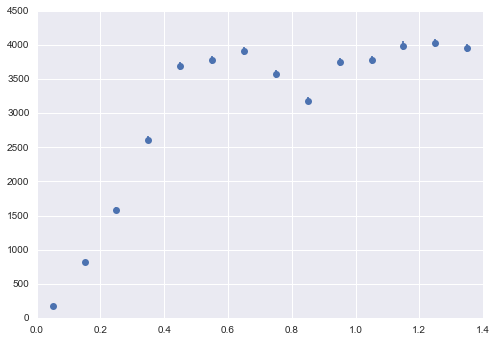

In [87]:
fig, ax = plt.subplots()
ax.errorbar(binnedData.zmids, binnedData.counts, np.sqrt(binnedData.counts), fmt='o' )
ax.set_xlim(0., 1.4)

## SN light Curves

In [29]:
import sncosmo
import gedankenLSST

In [30]:
lsstchar = gedankenLSST.LSSTReq

In [31]:
lsstchar['meanNumVisits'] = pd.Series(np.repeat(3650.,6), index=['u','g','r','i','z','y'])

In [32]:
lsstchar['meanNumVisits']

u    3650
g    3650
r    3650
i    3650
z    3650
y    3650
dtype: float64

In [33]:
sn = gedankenLSST.GSN_Obs(mjd_center=49530., lsstrequirements=lsstchar)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ae3dd0>]], dtype=object)

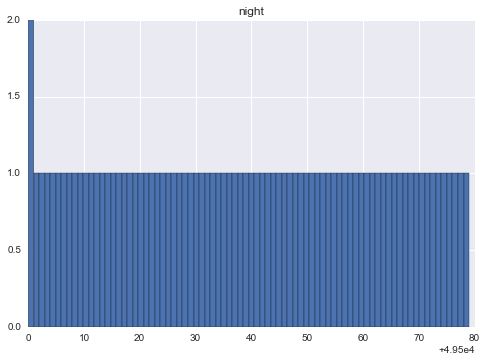

In [55]:
sndf = sn.summary
sndf[sndf['filter'] == 'u'].hist('night',bins=80)

In [56]:
s = gedankenLSST.SNObs(summarydf=sndf, t0=49530, lsst_bp=lsst_bp)

In [57]:
a = []
for z in binnedData.zmids.values[:12]:
    s.snState = {'z': z}
    lc = s.lightcurve
    totalEpochs = len(lc)
    highSNRlc = lc.query('SNR > 5')
    highSNREpochs = len(highSNRlc)
    highSNREpochs_u = len(highSNRlc.query("filter == 'u'"))
    highSNREpochs_g = len(highSNRlc.query("filter == 'g'"))
    highSNREpochs_r = len(highSNRlc.query("filter == 'r'"))
    highSNREpochs_i = len(highSNRlc.query("filter == 'i'"))
    highSNREpochs_z = len(highSNRlc.query("filter == 'z'"))
    highSNREpochs_y = len(highSNRlc.query("filter == 'y'"))
    
    a.append([z, highSNREpochs, highSNREpochs_u, highSNREpochs_g, highSNREpochs_r, highSNREpochs_i, highSNREpochs_z,
              highSNREpochs_y, totalEpochs, -2.5 * np.log10(s.SN.get('x0'))])

426
438
450
462
474
480
480
480
480
480
480
480


In [59]:
FlatzSummary  = pd.DataFrame(a, columns=['redshift', 'highSNREpochs', 'u', 'g', 'r', 'i', 'z', 'y', 'totalEpochs', 'mB'])

In [60]:
FlatzSummary['frac'] = FlatzSummary.highSNREpochs / FlatzSummary.totalEpochs

In [147]:
numSNperZBinDesired = 100./12.
FlatzSummary['NumSNperzBin'] = numSNperZBinDesired * 3650. / 80. / FlatzSummary['frac']

In [148]:
_nsn = FlatzSummary.NumSNperzBin.replace([-np.inf, np.inf], 0.) * FlatzSummary.frac
print(_nsn.sum() * 80. / 3650.) 

75.0


In [149]:
FlatzSummary['NumSNperzBin'] =  FlatzSummary['NumSNperzBin'] * (12./9.)

In [150]:
_nsn = FlatzSummary.NumSNperzBin.replace([-np.inf, np.inf], 0.) * FlatzSummary.frac
print(_nsn.sum() * 80. / 3650.) 

100.0


In [62]:
FlatzSummary['numGalsperzBin'] = binnedData['counts'].head(12)

In [63]:
FlatzSummary['numSNperGal'] = FlatzSummary['NumSNperzBin'] /FlatzSummary['numGalsperzBin'] 

In [152]:
FlatzSummary

,redshift,highSNREpochs,u,g,r,i,z,y,totalEpochs,mB,frac,NumSNperzBin,numGalsperzBin,numSNperGal
0,0.05,409,66,70,70,70,66,67,416,6.956935,0.983173,5.156208e+02,172,2.698016
1,0.15,376,38,68,70,69,68,63,424,9.490474,0.886792,5.716608e+02,819,0.628199
2,0.25,310,17,69,70,69,68,17,436,10.728750,0.711009,7.129928e+02,1582,0.405622
3,0.35,252,0,51,70,69,62,0,438,11.572595,0.575342,8.811177e+02,2612,0.303601
4,0.45,197,0,37,58,61,41,0,443,12.218191,0.444695,1.139982e+03,3697,0.277518
5,0.55,144,0,23,47,45,29,0,445,12.742532,0.323596,1.566599e+03,3782,0.372803
6,0.65,75,0,0,40,35,0,0,449,13.184282,0.167038,3.034907e+03,3915,0.697680
7,0.75,56,0,0,26,30,0,0,452,13.565828,0.123894,4.091766e+03,3571,1.031249
8,0.85,22,0,0,6,16,0,0,444,13.901397,0.049550,1.023106e+04,3186,2.890130
9,0.95,0,0,0,0,0,0,0,432,14.200651,0.000000,inf,3746,inf


In [46]:
model = sncosmo.Model(source='salt2')

In [47]:
from astropy.cosmology import FlatLambdaCDM

In [48]:
CatSimCosmo = FlatLambdaCDM(Om0=0.25, H0=73.)

In [85]:
df.head()

,id,raJ2000,decJ2000,redshift,a_d,b_d,pa_disk,zbin
0,4105749,0.928568,-0.488657,0.7900,0.194733,0.062292,117.10560,7
1,165497,0.928572,-0.488689,0.4245,0.549627,0.245425,144.40600,4
2,10820520,0.928563,-0.488667,0.4917,0.471334,0.241269,231.79910,4
3,14136962,0.928480,-0.488655,1.1047,0.096851,0.049755,50.98122,11
4,10050484,0.928521,-0.488682,0.4200,0.459121,0.225679,180.50970,4


In [ ]:
alpha = 0.11
beta = -3.4
np.random.seed(42)

In [ ]:
np.random.choice()

In [49]:
zvals = np.random.uniform(0., 0.1, size=numSN)
cvals = np.random.normal(0., 0.1, size=numSN)
x1vals = np.random.normal(0., 1.0, size=numSN)
M  = -19.3 - alpha * x1vals - beta * cvals
mB = np.zeros(numSN)
x0 = np.zeros(numSN)
t0 = np.random.uniform(0, 3650,numSN)
for i, Mabs in enumerate(M):
    model.set(z=zvals[i], c=cvals[i], x1=x1vals[i])
    model.set_source_peakabsmag(M[i], "bessellB", 'ab', cosmo=CatSimCosmo)
    x0[i] = model.get('x0')
    mB[i] = model.source.peakmag('bessellB', 'ab')

(array([  9.,  10.,  13.,  13.,   8.,  10.,  17.,  10.,   7.,  13.,   6.,
         13.,   6.,  11.,   6.,   8.,   9.,   7.,  10.,  11.,  14.,   9.,
         10.,  13.,  10.,  10.,   7.,   8.,  11.,  18.,   7.,   8.,   5.,
         13.,  12.,  16.,  13.,  10.,  10.,   9.,  11.,   8.,   7.,   9.,
         15.]),
 array([    0.,    80.,   160.,   240.,   320.,   400.,   480.,   560.,
          640.,   720.,   800.,   880.,   960.,  1040.,  1120.,  1200.,
         1280.,  1360.,  1440.,  1520.,  1600.,  1680.,  1760.,  1840.,
         1920.,  2000.,  2080.,  2160.,  2240.,  2320.,  2400.,  2480.,
         2560.,  2640.,  2720.,  2800.,  2880.,  2960.,  3040.,  3120.,
         3200.,  3280.,  3360.,  3440.,  3520.,  3600.]),
 <a list of 45 Patch objects>)

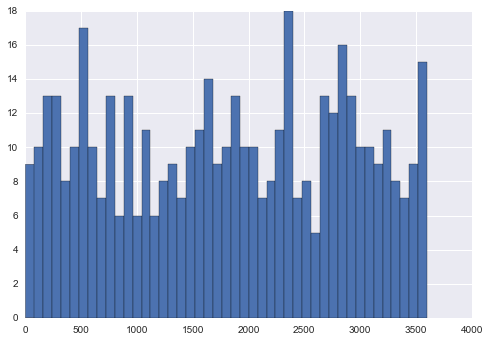

In [211]:
plt.hist(t0, bins=np.arange(0., 3650., 80))

(array([  1.,   0.,   0.,   2.,   5.,  19.,  19.,  32.,  52.,  48.,  56.,
         60.,  65.,  39.,  32.,  15.,   7.,   7.,   4.,   2.]),
 array([-3.48080883, -3.15851787, -2.83622691, -2.51393595, -2.19164499,
        -1.86935403, -1.54706307, -1.22477212, -0.90248116, -0.5801902 ,
        -0.25789924,  0.06439172,  0.38668268,  0.70897364,  1.0312646 ,
         1.35355556,  1.67584652,  1.99813747,  2.32042843,  2.64271939,
         2.96501035]),
 <a list of 20 Patch objects>)

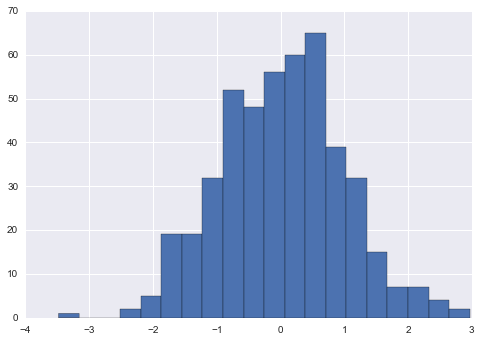

In [192]:
plt.hist(x1vals, bins=20)

# Scratch





In [91]:
s.snState = {'z':0.05}

In [120]:
slc = s.lightcurve
lcs = s.lightcurve.groupby("filter")

426
426


In [93]:
bands = lcs.groups.keys()
lc = lcs.get_group('g')
lc = lc.sort('time')
#lc.time = lc.time - 49530

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [94]:
s.SN.mintime()

49509.0

In [99]:
np.log10

<ufunc 'log10'>

In [121]:
slc['mag'] = -2.5 * np.log10(slc['flux'])

In [122]:
slc.head()

,time,filter,ra,dec,fiveSigmaDepth,fieldID,night,band,flux,fluxerr,zp,zpsys,SNR,mag
10,49509.876543,g,0,0,25,1,49509,g,2.848210e-11,1.978642e-11,0,ab,1.439477,26.363570
11,49510.864198,g,0,0,25,1,49510,g,1.480828e-10,2.014232e-11,0,ab,7.351826,24.573738
12,49511.851852,g,0,0,25,1,49511,g,3.136994e-10,2.062501e-11,0,ab,15.209659,23.758716
13,49512.839506,g,0,0,25,1,49512,g,8.919576e-10,2.222832e-11,0,ab,40.127080,22.624139
14,49513.827160,g,0,0,25,1,49513,g,3.267843e-09,2.786386e-11,0,ab,117.278933,21.214347


In [125]:
_t = slc.query('SNR > 5')
resids = _t.mag < _t.fiveSigmaDepth
print all(resids)
#print (resids.min(), resids.max())

True


In [100]:
-2.5*np.log10()

AttributeError: 'float' object has no attribute 'log10'

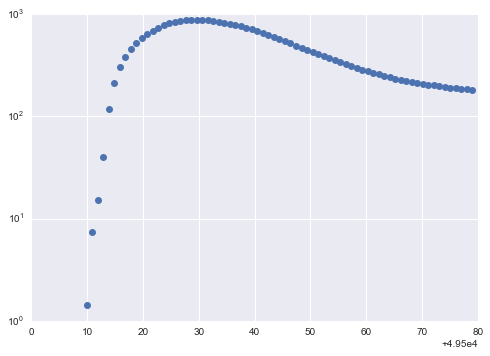

In [154]:
plt.plot(lc.time, lc.flux / lc.fluxerr, 'o')
plt.yscale('log')

In [155]:
sn.SN.maxtime()

AttributeError: 'GSN_Obs' object has no attribute 'SN'

In [164]:
binnedData['counts'].head(12)

0    172
Name: counts, dtype: float64